# QF 627 Extras - Financial Analytics
## Problem-Sets for Exercise `4` | `Questions`

> Hi Team! 👋

> Below you will find four intriguing analytic questions that you are likely to face in your day-to-day operations in the field. Just like our prior exercise problem sets, these questions are not meant for testing. As you work through them, you will find further consolidation of what you have learned from our class, lecture notes, and PyDay consultations.

> As discussed in class, during our PyDay, after our leaders of problem-solving have led the session, I'll go through some (if not all) of the problem set questions so that you can learn how to come up with model solutions for your benchmark in field practice.

> Enjoy 🤗

### <font color = green> Activation of necessary libraries for setting your print options

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

## <font color = red> Below, you will find `four larger sets` of questions. 
    
## <font color = tomato> Please ensure that you demonstrate the workflow of your problem-solving process for these business analytics questions. 
    
## <font color = tomato> Specifically, follow these steps: import → wrangle → EDA → further wrangle (if necessary) → visualize and/or model → refine the model and/or visualization → report.

## ❓ <a id = "top"> List of Analytic Questions </a> ❓

## [Q1. Propensity Score Matching with Inverse Probability Weights](#p1)

> ### <font color = red> 1 </font>

## [Q2. Difference-in-Differences](#p2)

> ### <font color = red> 2 </font>

## [Q3. RDD warm-up](#p3)

> ### <font color = red> RDD </font>

## [Q4. RDD](#p4)

> ### <font color = red> RDD </font>

## <a id = "p1"> </a> <font color = "red"> Big Question 1: Effects of Investing in Real Estate on Annual Returns [back to table of contents](#top)

### <font color = green> BUSINESS CONTEXT & ANALYTIC QUESTION
    
> You want to evaluate the impact of investment in real estate (InvestRealEstate) on annual returns (AnnualReturn). However, investment decisions are influenced by observable characteristics such as age, income, and risk tolerance. To account for these confounders, you use propensity score matching with inverse probability weighting.

### <mark> Dataset </mark> https://talktoroh.com/s/q1_psm_ipw.csv

### <font color = green> LIST of VARIABLES

* `InvestRealEstate` (binary: 0 = no, 1 = yes)

* `AnnualReturn` (numerical)

* `Age` (numerical)

* `Income` (numerical)

* `RiskTolerance` (numerical, scale 1-10)

### <font color = red> Steps to Answer the Question

    1. Import Your Data

    2. Wrangle Your Data

    3. Estimate propensity scores using logistic regression.

    4. Calculate inverse probability weights.

    5. Estimate the weighted regression of AnnualReturn on InvestRealEstate.

    6. Visualize the distribution of propensity scores by treatment group and the weighted regression results.

    7. Report the estimated treatment effect.

In [2]:
q1 =\
(
    pd
    .read_csv("https://talktoroh.com/s/q1_psm_ipw.csv")
)

q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   InvestRealEstate  1984 non-null   int64  
 1   AnnualReturn      1984 non-null   float64
 2   Age               1984 non-null   float64
 3   Income            1984 non-null   float64
 4   RiskTolerance     1984 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 77.6 KB


In [3]:
q1.describe()

,InvestRealEstate,AnnualReturn,Age,Income,RiskTolerance
count,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000
mean,0.977319,4456.516883,39.850477,74184.225086,5.438280
std,0.148923,4964.505066,9.787662,19678.458640,2.594679
min,0.000000,-11234.500112,9.538569,197.987241,1.004419
25%,1.000000,1250.037010,33.157893,60470.952387,3.131046
50%,1.000000,4381.802388,39.842693,74112.608884,5.443661
75%,1.000000,7674.761021,46.165661,87873.989499,7.693630
max,1.000000,20436.924103,71.709748,151033.204299,9.999610


In [4]:
q1["InvestRealEstate"].unique()

array([1, 0])

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

covariates = q1[['Age', 'Income', 'RiskTolerance']]
response = q1['InvestRealEstate']

# Standardize covariates
scaler = StandardScaler()
covariates_scaled = scaler.fit_transform(covariates)

logit = LogisticRegression()
logit.fit(covariates_scaled, response)
q1['propensity_score'] = logit.predict_proba(covariates_scaled)[:, 1]
q1['ipw'] = np.where(
    q1['InvestRealEstate'] == 1,
    1 / q1['propensity_score'],
    1 / (1 - q1['propensity_score'])
)

import statsmodels.api as sm

X = sm.add_constant(q1['InvestRealEstate'])
y = q1['AnnualReturn']
weights = q1['ipw']

weighted_model = sm.WLS(y, X, weights=weights).fit()
weighted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:           AnnualReturn   R-squared:                       0.014
Model:                            WLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     28.30
Date:                Fri, 06 Jun 2025   Prob (F-statistic):           1.16e-07
Time:                        13:56:51   Log-Likelihood:                -20371.
No. Observations:                1984   AIC:                         4.075e+04
Df Residuals:                    1982   BIC:                         4.076e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3165.0257    181.961     17.394      0.000    2808.170    3521.881
InvestRealEstate  1302.5499    244.855      5.320      0.000     822.350    1782.750
==============================================================================
Omnibus:                     1641.456   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           513099.619
Skew:                           2.914   Prob(JB):                         0.00
Kurtosis:                      81.568   Cond. No.                         2.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

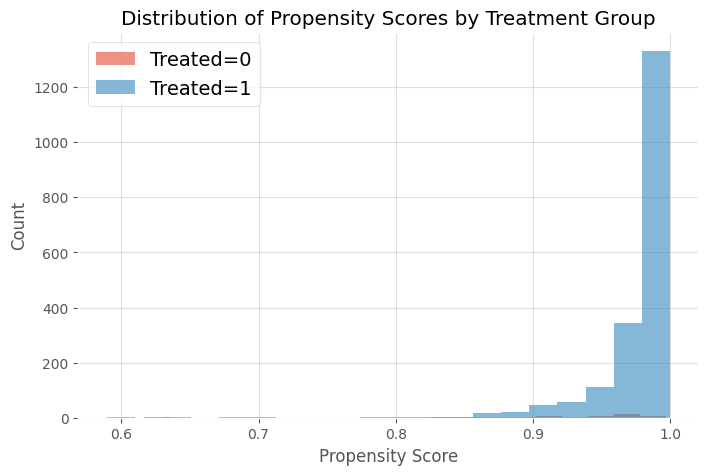

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
for label, group in q1.groupby('InvestRealEstate'):
    plt.hist(group['propensity_score'], bins=20, alpha=0.6, label=f'Treated={label}')
plt.xlabel('Propensity Score')
plt.ylabel('Count')
plt.title('Distribution of Propensity Scores by Treatment Group')
plt.legend()
plt.show()

In [7]:
ate = weighted_model.params['InvestRealEstate']
print(f"Investing in real estate increases annual returns by approximately ${ate:.2f}")

Investing in real estate increases annual returns by approximately $1302.55


### <font color = red> Report </font> 

> Investing in real estate increases annual returns by approximately $1,302.55.

## <a id = "p2"> </a> <font color = "red"> Big Question 2: Policy Impact on Housing Prices [back to table of contents](#top)

### <font color = green> BUSINESS CONTEXT & ANALYTIC QUESTION
    
> A new property tax policy was implemented in 2010 aimed at reducing real estate speculation. You want to analyze its impact on the average price of houses (HousePrice) using a difference-in-differences approach. You have data on house prices before (2008-2009) and after (2011-2012) the policy for both treated (cities affected by the policy) and control (cities not affected) groups.

### <mark> Dataset </mark> https://talktoroh.com/s/q2_DiD.csv

### <font color = green> LIST of VARIABLES

* `HousePrice` (numerical)

* `Year` (categorical: 2008, 2009, 2011, 2012)

* `Treated` (binary: 0 = no, 1 = yes)

* `Post` (binary: 0 = pre-policy, 1 = post-policy)

### <font color = red> Steps to Answer the Question

    1. Import Your Data

    2. Wrangle Your Data

    3. Generate synthetic data for 2015 observations.

    4. Create a binary variable indicating whether the observation is post-policy.

    5. Estimate the DiD regression model.

    6. Visualize the average house prices over time for treated and control groups.

    7. Report the estimated treatment effect of the policy on house prices.

In [8]:
q2 =\
(
    pd
    .read_csv("https://talktoroh.com/s/q2_DiD.csv")
)

q2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2015 entries, 0 to 2014
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   HousePrice  2015 non-null   float64
 1   Year        2015 non-null   int64  
 2   Treated     2015 non-null   int64  
 3   Post        2015 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 63.1 KB


In [9]:
q2.isnull().sum()

HousePrice    0
Year          0
Treated       0
Post          0
dtype: int64

In [10]:
print(q2['Treated'].unique(), q2['Post'].unique(), q2['Year'].unique())

[0 1] [0 1] [2008 2012 2009 2011]


In [11]:
import statsmodels.formula.api as smf

# DiD model: HousePrice ~ Treated + Post + Treated*Post
q2['Treated_Post'] = q2['Treated'] * q2['Post']
model = smf.ols('HousePrice ~ Treated + Post + Treated_Post', data=q2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             HousePrice   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     11.48
Date:                Fri, 06 Jun 2025   Prob (F-statistic):           1.83e-07
Time:                        13:56:52   Log-Likelihood:                -23571.
No. Observations:                2015   AIC:                         4.715e+04
Df Residuals:                    2011   BIC:                         4.717e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.499e+05   1312.368    190.428      0.000    2.47e+05    2.52e+05
Treated       9200.2446   1824.119      5.044      0.000    5622.885    1.28e+04
Post          4732.3766   1844.910      2.565      0.010    1114.243    8350.510
Treated_Post -1.373e+04   2597.835     -5.285      0.000   -1.88e+04   -8634.187
==============================================================================
Omnibus:                        3.519   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.172   Jarque-Bera (JB):                3.483
Skew:                          -0.077   Prob(JB):                        0.175
Kurtosis:                       2.868   Cond. No.                         6.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

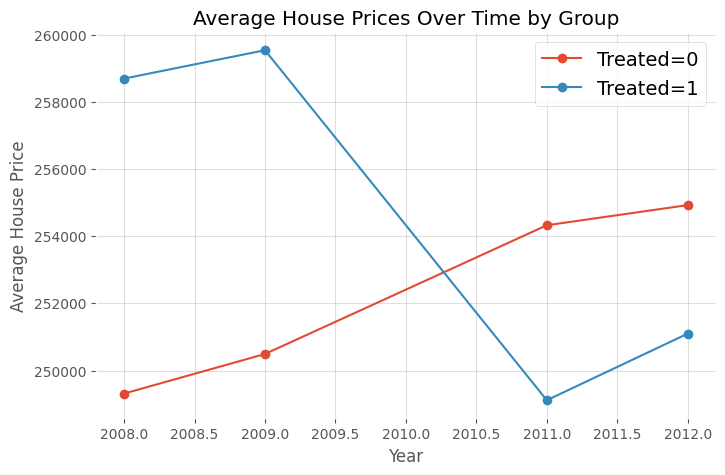

In [12]:
import matplotlib.pyplot as plt

avg_prices = q2.groupby(['Year', 'Treated'])['HousePrice'].mean().reset_index()
plt.figure(figsize=(8,5))
for treated, group in avg_prices.groupby('Treated'):
    plt.plot(group['Year'], group['HousePrice'], marker='o', label=f"Treated={treated}")
plt.xlabel('Year')
plt.ylabel('Average House Price')
plt.title('Average House Prices Over Time by Group')
plt.legend()
plt.show()

In [13]:
did_effect = model.params['Treated_Post']
print(f"The policy reduced house prices by approximately ${-did_effect:.2f} in treated.")

The policy reduced house prices by approximately $13728.92 in treated.


### <font color = red> Report </font> 

> The policy reduced house prices by approximately $13,728.92 in treated.

## <a id = "p3"> </a> <font color = "red"> Big Question 3: Effects of tutoring program on improvement in test scores [back to table of contents](#top)    

### <font color = green> ANALYTIC CONTEXT
    
> You are a policymaker in the field of educational policy. 
    
> At the beginning of a school year, students take an entrance exam. Those who score 70 or below are automatically enrolled in a free tutoring program and receive assistance throughout the year. At the end of the school year, students take a final test, or exit exam (with a maximum of 100 points), to measure their overall learning. 
    
> Fortunately, as a policymaker, you possess expertise in econometric designs and methods. Using your expertise, please assess whether the tutoring program had a causal impact on students' improvement in test scores. If so, by how much?

### <mark> Dataset </mark> https://talktoroh.com/s/educational_policy-jkd4.csv

### <font color = green> LIST of VARIABLES

* `id`: Student ID
<br>    
* `tutoring`: Categorical variable showing whether the student was enrolled in the tutoring program
<br>
    
* `entrance_exam`: Student's entrance exam score (out of 100)
<br>    
    
* `exit_exam`: Student's exit exam score (out of 100)

### <font color = red> IMPORT

In [14]:
q3 =\
(
    pd
    .read_csv("https://talktoroh.com/s/educational_policy-jkd4.csv")
)

q3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   entrance_exam  1000 non-null   float64
 2   tutoring       1000 non-null   bool   
 3   tutoring_text  1000 non-null   object 
 4   exit_exam      1000 non-null   float64
dtypes: bool(1), float64(2), int64(1), object(1)
memory usage: 32.4+ KB


### <font color = red> WRANGLE </font>

In [15]:
# Convert 'tutoring' to binary if not already (1 = received tutoring, 0 = did not)
q3['tutoring'] = q3['tutoring'].map({'yes': 1, 'no': 0}) if q3['tutoring'].dtype == object else q3['tutoring']

# Create improvement variable
q3['improvement'] = q3['exit_exam'] - q3['entrance_exam']

### <font color = red> Exploratory Data Analysis </font>

In [16]:
q3[['tutoring', 'entrance_exam', 'exit_exam', 'improvement']].groupby('tutoring').describe()

entrance_exam                                                      \
                 count       mean       std   min   25%   50%    75%   max   
tutoring                                                                     
False            759.0  83.860211  7.313009  70.1  78.0  83.9  89.75  99.8   
True             241.0  60.136100  8.734719  28.8  56.2  63.0  66.70  70.0   

         exit_exam             ...             improvement             \
             count       mean  ...   75%   max       count       mean   
tutoring                       ...                                      
False        759.0  66.476285  ...  72.0  84.5       759.0 -17.383926   
True         241.0  65.182988  ...  71.4  80.4       241.0   5.046888   

                                                  
               std   min   25%   50%   75%   max  
tutoring                                          
False     7.450631 -39.8 -22.3 -17.2 -12.4   1.5  
True      7.789619 -15.6   0.2   5.4  10.8  26.9  

[2 rows x 24 columns]

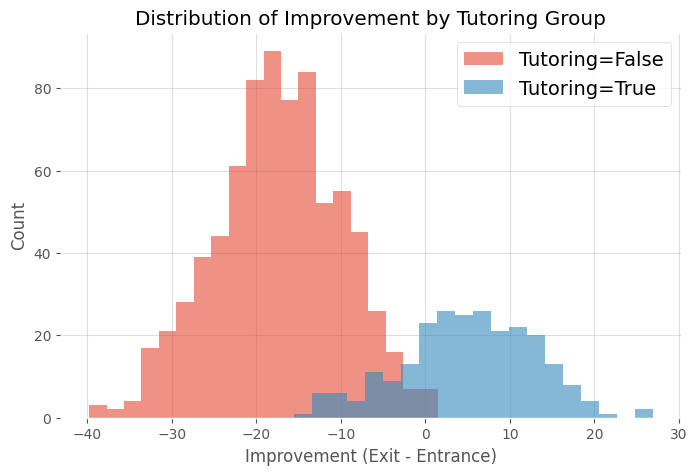

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
for label, group in q3.groupby('tutoring'):
    plt.hist(group['improvement'], bins=20, alpha=0.6, label=f'Tutoring={label}')
plt.xlabel('Improvement (Exit - Entrance)')
plt.ylabel('Count')
plt.title('Distribution of Improvement by Tutoring Group')
plt.legend()
plt.show()

### <font color = red> Modeling or Visualization </font>

In [18]:
import statsmodels.formula.api as smf
model = smf.ols('improvement ~ tutoring', data=q3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            improvement   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     1622.
Date:                Fri, 06 Jun 2025   Prob (F-statistic):          2.35e-211
Time:                        13:56:52   Log-Likelihood:                -3437.3
No. Observations:                1000   AIC:                             6879.
Df Residuals:                     998   BIC:                             6888.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -17.3839      0.273    -63.573      0.000     -17.921     -16.847
tutoring[T.True]    22.4308      0.557     40.269      0.000      21.338      23.524
==============================================================================
Omnibus:                        5.297   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                5.051
Skew:                          -0.135   Prob(JB):                       0.0800
Kurtosis:                       2.779   Cond. No.                         2.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### <font color = red> Visualization or Modeling </font> 

<Figure size 600x400 with 0 Axes>

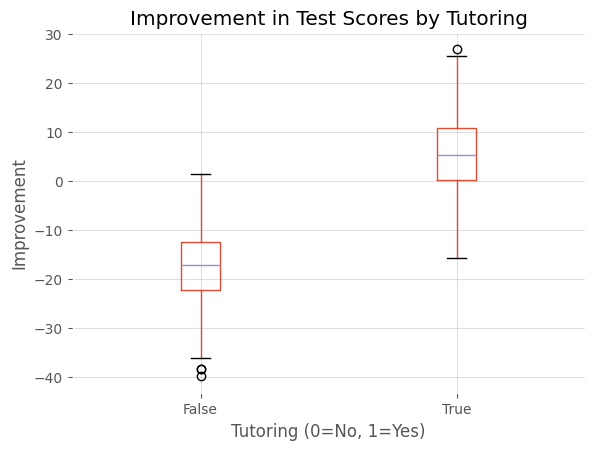

In [19]:
plt.figure(figsize=(6,4))
q3.boxplot(column='improvement', by='tutoring')
plt.title('Improvement in Test Scores by Tutoring')
plt.suptitle('')
plt.xlabel('Tutoring (0=No, 1=Yes)')
plt.ylabel('Improvement')
plt.show()

> `Answer`: `Please provide your assessment of the causal effects here.`

In [20]:
# Report estimated effect
effect = model.params['tutoring[T.True]']
print(f"Estimated effect of tutoring program on improvement in test scores: {effect:.2f} points")

Estimated effect of tutoring program on improvement in test scores: 22.43 points


## <a id = "p4"> </a> <font color = "red"> Big Question 4: Effects of FED conference talk on the stock prices of companies [back to table of contents](#top)    

### <font color = green> ANLYTIC CONTEXT: Causal Inference Question in Hand
    
> You are given a dataset related to the impact of a Federal Reserve (FED) conference talk on the stock prices of companies. The talk, which took place 100 days ago, is expected to have significant implications for financial markets, creating a `natural` experiment for assessing its effect. The dataset includes stock prices of several companies for a period of 100 days before and 100 days after the conference talk, up to today.

### <mark> Dataset </mark> https://talktoroh.com/s/fed_conference_talk.csv

### <font color = green> LIST of VARIABLES

- `company_id`: Unique identifier for each company.
<br>

- `date`: Date of the stock price observation.
<br>

- `stock_price`: Stock price of the company.
<br>

- `policy_change`: Indicator variable (0 = before FED talk, 1 = after FED talk).
<br>

- `days_to_policy`: Number of days to the FED talk (negative values = before talk, positive values = after talk).

### <font color = green> Your analysis should contain the following processes, aligned with the analytics workflow.

- Plot the stock prices against the days to policy change to visually inspect any discontinuity at the cutoff.

- Implement the RDD using the following steps:

- Define the cutoff point.

- Fit a regression model on both sides of the cutoff.

- Apply triangle kernel weights to estimate LATE.

- Provide a detailed interpretation of the estimated effect of the FED conference talk on stock prices.

### <font color = red> IMPORT

In [21]:
q4 =\
(
    pd
    .read_csv("https://talktoroh.com/s/fed_conference_talk.csv")
)

q4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10050 entries, 0 to 10049
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company_id      10050 non-null  int64  
 1   date            10050 non-null  object 
 2   stock_price     10050 non-null  float64
 3   policy_change   10050 non-null  int64  
 4   days_to_policy  10050 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 392.7+ KB


### <font color = red> WRANGLE </font>

In [22]:
q4.isnull().sum()

company_id        0
date              0
stock_price       0
policy_change     0
days_to_policy    0
dtype: int64

In [23]:
q4['policy_change'] = q4['policy_change'].astype(int)
q4['days_to_policy'] = q4['days_to_policy'].astype(int)

### <font color = red> Exploratory Data Analysis </font>

In [24]:
# Summary statistics
q4[['stock_price', 'policy_change', 'days_to_policy']].describe()

,stock_price,policy_change,days_to_policy
count,10050.000000,10050.000000,10050.000000
mean,102.535136,0.502488,0.000000
std,5.751297,0.500019,58.025871
min,81.994574,0.000000,-100.000000
25%,98.495249,0.000000,-50.000000
50%,102.498740,1.000000,0.000000
75%,106.418388,1.000000,50.000000
max,122.934011,1.000000,100.000000


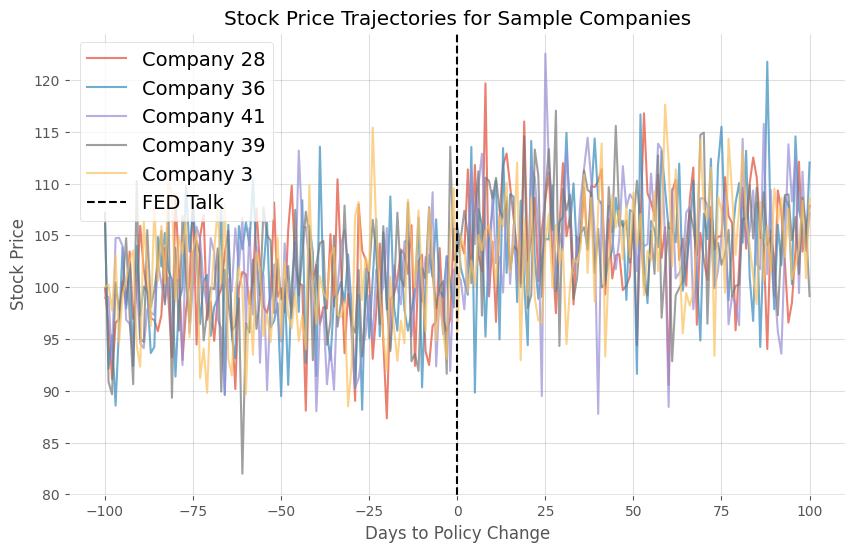

In [25]:
# Plot stock prices vs days to policy change for a random sample of companies
import matplotlib.pyplot as plt
sample_companies = q4['company_id'].drop_duplicates().sample(5, random_state=1)
plt.figure(figsize=(10,6))
for cid in sample_companies:
    subset = q4[q4['company_id'] == cid]
    plt.plot(subset['days_to_policy'], subset['stock_price'], alpha=0.7, label=f'Company {cid}')
plt.axvline(0, color='black', linestyle='--', label='FED Talk')
plt.xlabel('Days to Policy Change')
plt.ylabel('Stock Price')
plt.title('Stock Price Trajectories for Sample Companies')
plt.legend()
plt.show()

### <font color = red> Visualization or Modeling </font>

In [26]:
# Local linear regression (RDD) around the cutoff (days_to_policy = 0)
# We'll use a window of 20 days on each side and triangle kernel weights
def triangle_kernel(x, bandwidth):
    return np.maximum(1 - np.abs(x / bandwidth), 0)

bandwidth = 20
q4_rdd = q4[np.abs(q4['days_to_policy']) <= bandwidth].copy()
q4_rdd['kernel_weight'] = triangle_kernel(q4_rdd['days_to_policy'], bandwidth)

import statsmodels.formula.api as smf
# Fit local linear regression with interaction for policy_change
model = smf.wls('stock_price ~ policy_change + days_to_policy', data=q4_rdd, weights=q4_rdd['kernel_weight']).fit()
model.summary()

/opt/homebrew/Cellar/jupyterlab/4.4.3/libexec/lib/python3.13/site-packages/statsmodels/regression/linear_model.py:806: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:            stock_price   R-squared:                       0.168
Model:                            WLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     206.8
Date:                Fri, 06 Jun 2025   Prob (F-statistic):           1.61e-82
Time:                        13:56:53   Log-Likelihood:                   -inf
No. Observations:                2050   AIC:                               inf
Df Residuals:                    2047   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        100.6868      0.234    430.489      0.000     100.228     101.146
policy_change      4.1386      0.390     10.598      0.000       3.373       4.904
days_to_policy     0.0327      0.024      1.367      0.172      -0.014       0.080
==============================================================================
Omnibus:                       69.416   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.763
Skew:                          -0.068   Prob(JB):                     1.25e-40
Kurtosis:                       4.460   Cond. No.                         32.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### <font color = red> Modeling or Visualization </font> 

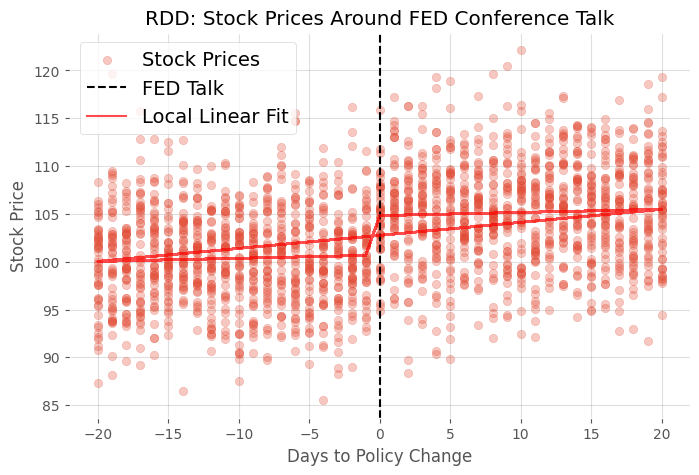

In [27]:
plt.figure(figsize=(8,5))
plt.scatter(q4_rdd['days_to_policy'], q4_rdd['stock_price'], alpha=0.3, label='Stock Prices')
plt.axvline(0, color='black', linestyle='--', label='FED Talk')

# Plot fitted values
pred = model.predict(q4_rdd[['policy_change', 'days_to_policy']])
plt.plot(q4_rdd['days_to_policy'], pred, color='red', alpha=0.7, label='Local Linear Fit')
plt.xlabel('Days to Policy Change')
plt.ylabel('Stock Price')
plt.title('RDD: Stock Prices Around FED Conference Talk')
plt.legend()
plt.show()

### <font color = red> Visualization or Modeling </font> 

> `Answer`: `Please provide your assessment of the causal effects here.`

In [28]:
# Report estimated effect at cutoff
effect = model.params['policy_change']
print(f"Estimated causal effect of FED conference talk on stock prices at cutoff: {effect:.2f}")

Estimated causal effect of FED conference talk on stock prices at cutoff: 4.14


### <font color="green">"Thank you for putting your efforts into the exercise problem sets 💯"</font>